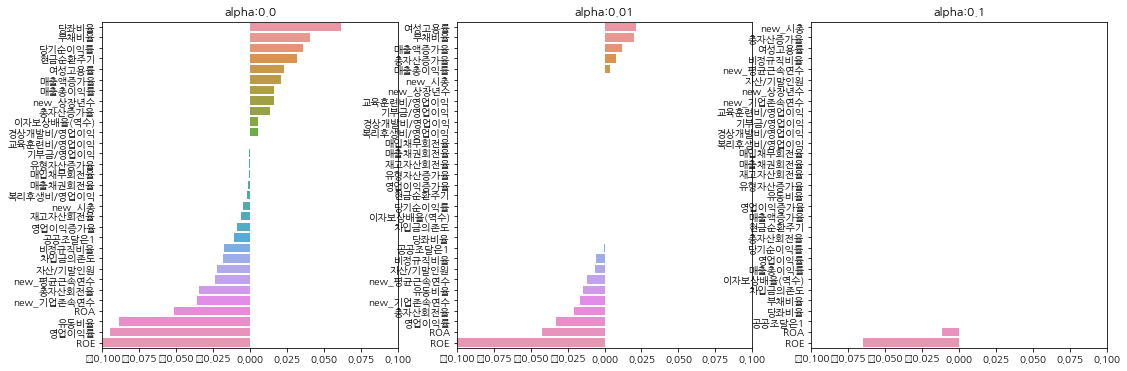

ROE           0.109411
ROA           0.042571
영업이익률         0.032809
여성고용률         0.021113
총자산회전율        0.020484
부채비율          0.020177
new_기업존속연수    0.016506
유동비율          0.014562
new_평균근속연수    0.012203
매출액증가율        0.011614
총자산증가율        0.007453
자산/기말인원       0.006292
비정규직비율        0.005708
매출총이익률        0.003705
공공조달은1        0.000364
new_상장년수      0.000000
복리후생비/영업이익    0.000000
교육훈련비/영업이익    0.000000
기부금/영업이익      0.000000
경상개발비/영업이익    0.000000
new_시총        0.000000
매입채무회전율       0.000000
매출채권회전율       0.000000
재고자산회전율       0.000000
영업이익증가율       0.000000
현금순환주기        0.000000
당기순이익률        0.000000
이자보상배율(역수)    0.000000
차입금의존도        0.000000
당좌비율          0.000000
유형자산증가율       0.000000
dtype: float64


In [6]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
import openpyxl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,  LogisticRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score, roc_auc_score, roc_curve
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Binarizer

data = pd.read_excel("../datasets/최최종_27.xlsx")
data.fillna(0, inplace=True)
# 처음 들어갈 피쳐들
x = data[['new_시총','유동비율', '당좌비율', '부채비율', '차입금의존도', '이자보상배율(역수)', '매출총이익률', '영업이익률', '당기순이익률', 'ROA', 'ROE',
       '총자산회전율', '현금순환주기', '매출액증가율', '영업이익증가율', '유형자산증가율', '총자산증가율','재고자산회전율', '매출채권회전율', '매입채무회전율',
       '복리후생비/영업이익','경상개발비/영업이익', '기부금/영업이익', '교육훈련비/영업이익', 'new_기업존속연수', 'new_상장년수',
       '자산/기말인원', 'new_평균근속연수', '비정규직비율', '여성고용률', '공공조달은1']]

y = data['K1_Score_ad']
y = y.apply(lambda x: 1 if(x=="부실" or x=="판정보류") else 0)
st = StandardScaler()
x= st.fit_transform(x)

# 그래프에 표시하기 위한 리스트
columns=['new_시총','유동비율', '당좌비율', '부채비율', '차입금의존도', '이자보상배율(역수)', '매출총이익률', '영업이익률', '당기순이익률', 'ROA', 'ROE',
       '총자산회전율', '현금순환주기', '매출액증가율', '영업이익증가율', '유형자산증가율', '총자산증가율','재고자산회전율', '매출채권회전율', '매입채무회전율',
       '복리후생비/영업이익','경상개발비/영업이익', '기부금/영업이익', '교육훈련비/영업이익', 'new_기업존속연수', 'new_상장년수',
       '자산/기말인원', 'new_평균근속연수', '비정규직비율', '여성고용률', '공공조달은1'  ]
x=pd.DataFrame(x, columns=columns)

plt.rcParams['font.family'] = 'NanumGothic'

alphas = [0.0, 0.01, 0.1 ]

fig , axs = plt.subplots(figsize=(18,6) , nrows=1 , ncols=3)
# 각 alpha에 따른 회귀 계수 값을 데이터로 저장하기 위한 DataFrame 생성  
coeff_df = pd.DataFrame()

# alphas 리스트 값을 차례로 입력해 회귀 계수 값 시각화 및 데이터 저장. pos는 axis의 위치 지정
for pos , alpha in enumerate(alphas) :
    lasso = Lasso(alpha = alpha)
    lasso.fit(x , y)
    # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가.  
    coeff = pd.Series(data=lasso.coef_ , index=x.columns )
    colname='alpha:'+str(alpha)
    coeff_df[colname] = coeff
    # 막대 그래프로 각 alpha 값에서의 회귀 계수를 시각화. 회귀 계수값이 높은 순으로 표현
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-0.1,0.1)
    sns.barplot(x=coeff.values , y=coeff.index, ax=axs[pos])

# for 문 바깥에서 맷플롯립의 show 호출 및 alpha에 따른 피처별 회귀 계수를 DataFrame으로 표시
plt.show()

coeff_df = pd.DataFrame()

lasso = Lasso(alpha = 0.01)
lasso.fit(x , y)
 
coeff = pd.Series(data=lasso.coef_ , index=x.columns )
coeff2=abs(coeff)
coeff2 = coeff2.sort_values(ascending=False)
print(coeff2)